In [1]:
# Author: Alexander Maksiaev
# Purpose: Analyze results from sentiment analysis -- this time from SentiWords module

In [2]:
# Housekeeping: Importing libraries, switching directories, etc.

import os
import pandas as pd
import csv 
import numpy as np
from statistics import mean
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import docx

os.getcwd()

results_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\GitHub_DMP\Results"

results = os.listdir(results_dir)

os.chdir(results_dir)
sns.set_palette("viridis")

In [3]:
# Getting the data frame

results_clean = []
df = pd.read_csv("sentiments_sentiwords_2_17_2024_transgender.csv", low_memory=False)
print(df)
df = df.sort_values("Textbook")

print(df)

                              Textbook     Score
0    Abn_Barlow_04_Transgender_v2.docx -0.023734
1    Abn_Barlow_05_Transgender_v2.docx -0.025597
2    Abn_Barlow_06_Transgender_v2.docx  0.006369
3    Abn_Barlow_07_Transgender_v2.docx -0.062992
4       Abn_Barlow_08_Transgender.docx -0.009459
..                                 ...       ...
233  Spcl_Turnbull_05_Transgender.docx  0.064103
234  Spcl_Turnbull_06_Transgender.docx  0.002165
235  Spcl_Turnbull_07_Transgender.docx -0.032895
236  Spcl_Turnbull_08_Transgender.docx  0.084433
237    Spcl_Vaughn_07_Transgender.docx  0.085903

[238 rows x 2 columns]
                              Textbook     Score
0    Abn_Barlow_04_Transgender_v2.docx -0.023734
1    Abn_Barlow_05_Transgender_v2.docx -0.025597
2    Abn_Barlow_06_Transgender_v2.docx  0.006369
3    Abn_Barlow_07_Transgender_v2.docx -0.062992
4       Abn_Barlow_08_Transgender.docx -0.009459
..                                 ...       ...
233  Spcl_Turnbull_05_Transgender.docx  0.064

                              Textbook     Score    Author Field
0    Abn_Barlow_04_Transgender_v2.docx -0.023734    Barlow   Abn
1    Abn_Barlow_05_Transgender_v2.docx -0.025597    Barlow   Abn
2    Abn_Barlow_06_Transgender_v2.docx  0.006369    Barlow   Abn
3    Abn_Barlow_07_Transgender_v2.docx -0.062992    Barlow   Abn
4       Abn_Barlow_08_Transgender.docx -0.009459    Barlow   Abn
..                                 ...       ...       ...   ...
233  Spcl_Turnbull_05_Transgender.docx  0.064103  Turnbull  Spcl
234  Spcl_Turnbull_06_Transgender.docx  0.002165  Turnbull  Spcl
235  Spcl_Turnbull_07_Transgender.docx -0.032895  Turnbull  Spcl
236  Spcl_Turnbull_08_Transgender.docx  0.084433  Turnbull  Spcl
237    Spcl_Vaughn_07_Transgender.docx  0.085903    Vaughn  Spcl

[238 rows x 4 columns]


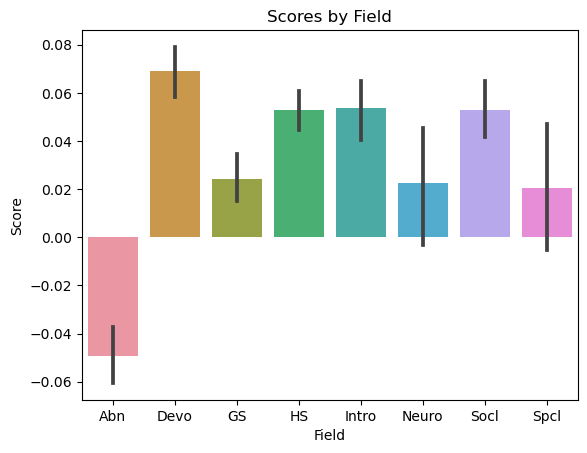

In [4]:
# Field Analysis

# Break up the data frame into fields

field_df = df

fields = ["Abn", "Devo", "GS", "HS", "Intro", "Neuro", "Socl", "Spcl"]

all_fields = []

fields_regex = ["Abn.*", "Devo.*", "Intro.*", "Neuro.*", "Socl.*", "Spcl.*", "GS.*", "HS.*"]

authors = ["Barlow", "Brown", "Comer", "Hooley", "Kearney", "Mash", "Nevid", "Nolen-Hoeksema", "Sue", 
                 "Whitbourne", "Berger", "Berk", "Bornstein", "Feldman", "Kail", "Miller", "Devo_Newman", "Santrock", 
                 "Sigelman", "Bernstein", "Coon", "Griggs", "Intro_Kalat", "Morris", "Intro_Myers", "Rathus", "Wade", "Weiten", 
                 "Bear", "Breedlove", "Carlson", "Garrett", "Johnson", "Neuro_Kalat", "Kolb", "Pinel", "Reisberg", "Aronson", 
                 "Baumeister", "Branscombe", "Gilovich", "Gruman", "Socl_Myers", "Rogers", "Zastrow", "Friend", "Gargiulo", "Hardman", 
                 "Heward", "Kuder", "Lewis", "Overton", "Smith", "Turnbull", "Vaughn", 
                 "GS_Newman", "Rothenberg", "Wood", "Carroll", "Crooks", "Hyde", "LeVay", 
                 "Gonzalez-Mena", "Haines", "Franzoi", "Kassin", "Andersen", "Brannon", "Healey", "Helgeson", "Kimmel", "Robinson", 
                 "Greenberg", "Hock", "Yarber"]



for field in fields_regex:
    field_l = field_df[field_df["Textbook"].str.contains(field, regex=True)]
    all_fields.append(field_l)
    

# Find average score per field

field_means = []
field_names = []
author_names = []
                
for textbook in range(len(field_df)):
    if len(field_df[field_df["Textbook"].str.contains("^.+_", regex=True)]) > 0:
        chunk = field_df["Textbook"].iloc[textbook]
        field = chunk.split("_")[0]
        author = chunk.split("_")[1]
        field_names.append(field)
        author_names.append(author)
    
field_df["Author"] = author_names
field_df["Field"] = field_names

# mean = field_df.groupby('Field')['Score'].mean()
# std = field_df.groupby('Field')['Score'].std()

fig, ax = plt.subplots()

print(field_df)

sns.barplot(ax = ax,
    data=field_df, x="Field", y="Score"
)
# ax.errorbar(mean.index, mean)
ax.set_title("Scores by Field")

plt.savefig('fields_transgender_sentiwords.png')

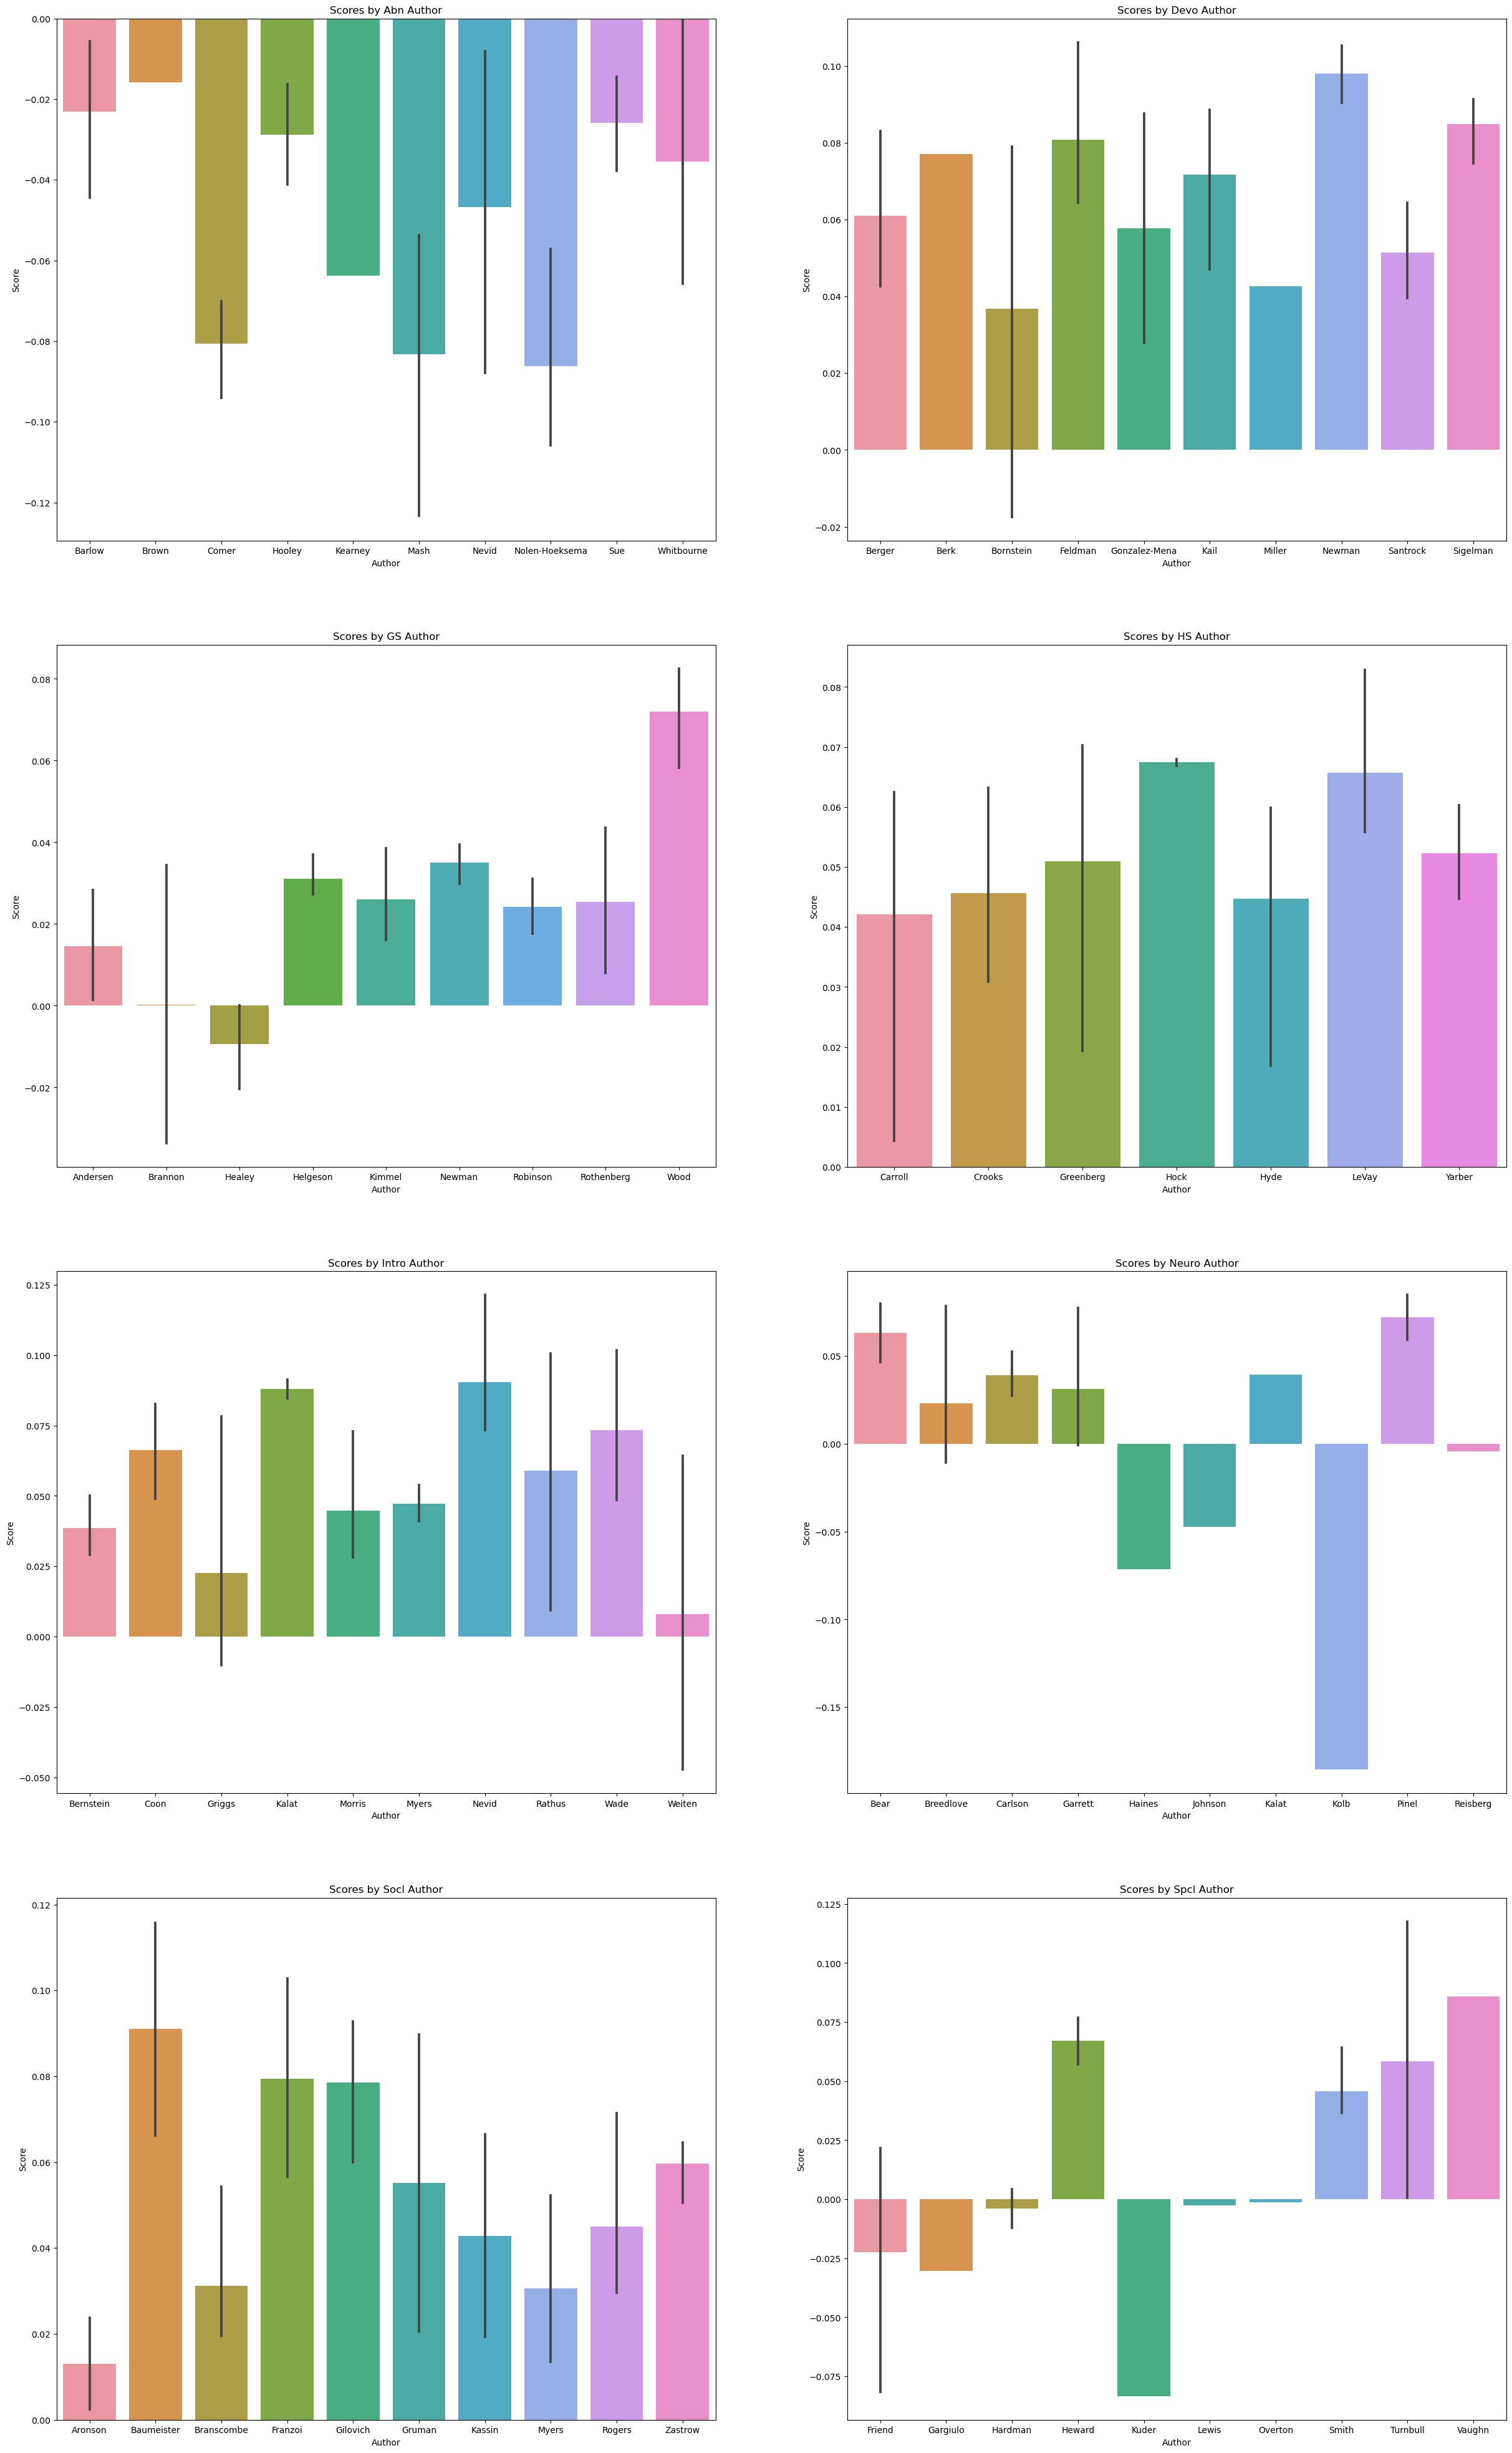

In [5]:
# Author Analysis

# Break up dataframe into authors

author_df = field_df

all_authors = []

for author in authors:
    author_l = author_df[author_df["Textbook"].str.contains(author)]
    all_authors.append(author_l)

author_means_df = author_df

fig, ax = plt.subplots(4, 2, figsize = (30,50))

sns.barplot(ax = ax[0][0],
    data=author_means_df.loc[author_means_df['Field']=='Abn'], x="Author", y="Score"
)
sns.barplot(ax = ax[0][1],
    data=author_means_df.loc[author_means_df['Field']=='Devo'], x="Author", y="Score"
)
sns.barplot(ax = ax[1][0],
    data=author_means_df.loc[author_means_df['Field']=='GS'], x="Author", y="Score"
)
sns.barplot(ax = ax[1][1],
    data=author_means_df.loc[author_means_df['Field']=='HS'], x="Author", y="Score"
)
sns.barplot(ax = ax[2][0],
    data=author_means_df.loc[author_means_df['Field']=='Intro'], x="Author", y="Score"
)
sns.barplot(ax = ax[2][1],
    data=author_means_df.loc[author_means_df['Field']=='Neuro'], x="Author", y="Score"
)
sns.barplot(ax = ax[3][0],
    data=author_means_df.loc[author_means_df['Field']=='Socl'], x="Author", y="Score"
)
sns.barplot(ax = ax[3][1],
    data=author_means_df.loc[author_means_df['Field']=='Spcl'], x="Author", y="Score"
)

ax[0][0].set_title("Scores by Abn Author")
ax[0][1].set_title("Scores by Devo Author")
ax[1][0].set_title("Scores by GS Author")
ax[1][1].set_title("Scores by HS Author")

ax[2][0].set_title("Scores by Intro Author")
ax[2][1].set_title("Scores by Neuro Author")
ax[3][0].set_title("Scores by Socl Author")
ax[3][1].set_title("Scores by Spcl Author")

# for f in fields:
for counter in range(4):
    for subcounter in range(2):
        extent = ax[counter][subcounter].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        title = "authors_transgender_" + str(counter) + "_" + str(subcounter) + "_sentiwords.png"
        ax[counter][subcounter].figure.savefig(title, bbox_inches=extent.expanded(1.2, 1.20))
    counter += 1


In [6]:
# # Edition Analysis

# edition_df = df

# # Cut up dataframe into chunks by author

# all_editions = []
# author_total = []
# test = []
# slope = []
# for a_df in all_authors:
#     author_name = ""
#     alphabetical = a_df["Textbook"].str.split("_").values 
#     editions = [] # Get only the edition
#     for l in alphabetical:
#         editions.append(l[2])
#         all_editions.append(l[2])
#         author_name = l[0] + "_" + l[1]
#         author_total.append(author_name)
#     test.append(editions)
#     a_df.loc[:,"Edition"] = editions
#     a_df.loc[:,"Edition"] = pd.to_numeric(a_df["Edition"])
#     a_df = a_df.sort_values("Edition")
#     if len(a_df["Edition"]) > 0:
#         res = stats.linregress(a_df["Edition"].astype(float), a_df["Score"])
#         for l in alphabetical:
#             if len(alphabetical) > 1:
#                 slope.append(res.slope)
#             else:
#                 slope.append(0)

# edition_df["Edition"] = all_editions
# edition_df["Author"] = author_total
# edition_df["Slope"] = slope
# print(edition_df)

# fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# # Break up plot into plot where slopes are negative (<-0.055) and plot where slopes are positive (>0.055)

# high = edition_df[edition_df["Slope"] > 0.055]
# high = high.sort_values("Edition")
# sns.lineplot(ax = axes[0], x="Edition", y="Score", hue="Author", data=high, sort=False)

# low = edition_df[edition_df["Slope"] <= -0.055]
# h = sns.lineplot(ax = axes[1], x="Edition", y="Score", hue="Author", data=low)

# plt.show()


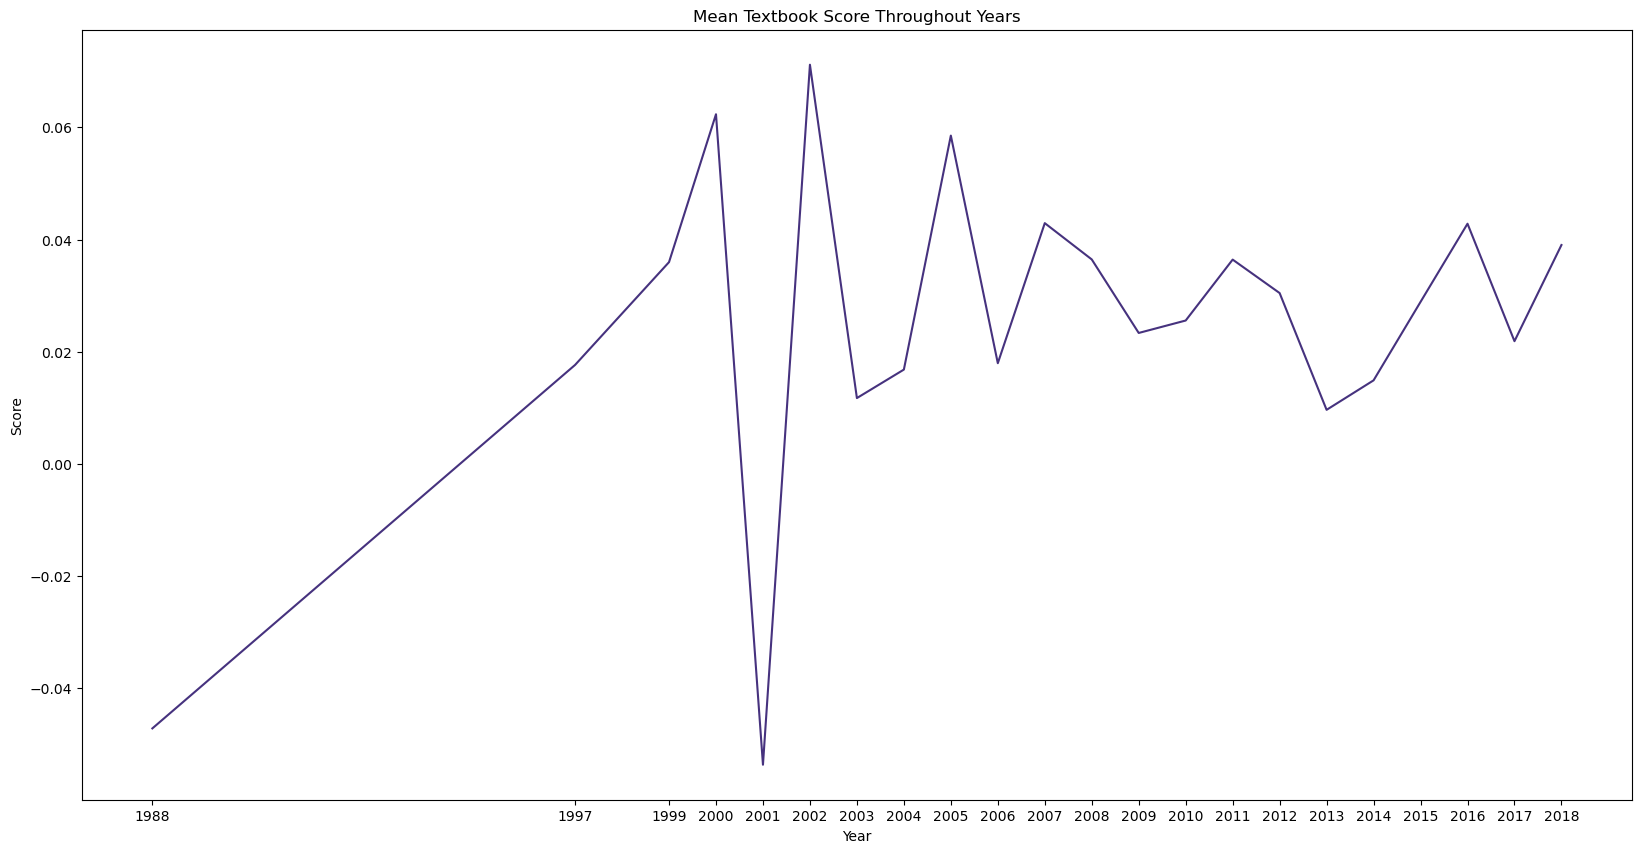

In [7]:
# Year Analysis

year_df = df

# There is a better way to get dates...

textbook_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\Textbook_Dump_Transgender"

textbooks = os.listdir(textbook_dir)

os.chdir(textbook_dir)

# Function to get full text
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return fullText

# Dictionary filled with years for all the books
book_years = {}
for book in textbooks:
    total_text = getText(book)
    titles = total_text[1]
    no_parentheses = titles[1:len(titles)-1]
    if "," in no_parentheses:
        year = no_parentheses.split(",")[1]
        year = int(year)
        book_years[book] = year

# Overall mean for each year, for all textbooks

# Make new dictionary where year corresponds to a list of textbooks
year_textbooks = {}

# Get all the years
years = []
for book in book_years:
    year = book_years[book]
    if year not in years:
        years.append(year)
years.sort()

# Now, add each year as a key and a list of books as the value
for year in years:
    books = []
    for book in book_years:
        if book_years[book] == year:
            books.append(book)
    year_textbooks[year] = books
    

# Find mean of the books in each year

year_scores = {}
for year in year_textbooks:
    book_list = year_textbooks[year]
    scores = []
    for book in book_list:
        # Find the book in the df
        string_to_query = "Textbook=='" + book + "'"
        score = year_df.query(string_to_query)["Score"]
        scores.append(float(score.iloc[0]))
    average = mean(scores)
    year_scores[year] = [year, average]
    
# Graph it

graphing_years = pd.DataFrame.from_dict(year_scores, orient="index", columns=["Year", "Score"])
# graphing_years = graphing_years.reset_index()

os.chdir(results_dir)

fig, ax = plt.subplots(figsize=(20, 10)) 

sns.lineplot(ax = ax, x="Year", y="Score", data=graphing_years)
ax.set_xticks(graphing_years["Year"])
ax.set_title("Mean Textbook Score Throughout Years")
plt.savefig('years_transgender_sentiwords.png')

In [8]:
# Does length of passage matter?

os.chdir(textbook_dir)

# Function to get full text
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return fullText

# Dictionary filled with text for all the books, minus the titles
title_text = {}
for book in textbooks:
    total_text = getText(book)
    text_without_title = total_text[4:]
    for piece in text_without_title:
        if piece == '':
            text_without_title.remove(piece) # Does not get rid of all whitespace, but ah well.
    title_text[book] = text_without_title
    
    
# Remove stop words from each book

stopwords_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\Stop_Words" 

os.chdir(stopwords_dir)

f = open("stop_words_english_original.txt", "r", encoding="utf-8")
stopwords = []
for text in f:
    text = text.replace('\n', '')
    stopwords.append(text)


punc = '''!()[]{};:'-"\,<>./?@#$%^&*_~''' # Must include "-" in words... or not?

# Function to clean up text and remove stopwords
def clean(book):
    text_list = title_text[book]
    new_text_list = []
    
    # Clean up text
    for text in text_list:
        text = text.strip()
        text = text.lower()
        text = text.split(' ')
        new_text_list.append(text)


    newer_text_list = []
    
    # Remove punctuation
    for sentence in new_text_list:
        for word in sentence:
            for char in punc:
                if char in word:
                    word = word.replace(char, '')
            newer_text_list.append(word)
                
    # Remove stop words
    newest_text_list = []
    for words in newer_text_list:
        if words not in stopwords:
            newest_text_list.append(words)

    # Remove blanks
    for w in newest_text_list:
        if len(w) == 0:
            newest_text_list.remove(w)
            
    return newest_text_list

# Update all the books with their clean, stopword-less counterparts

clean_texts = {}
for book in title_text:
    newest_text_list = clean(book)
    clean_texts[book] = newest_text_list
    
# Find length of all texts
lengths = {}
for book in clean_texts:
    length_of_text = len(clean_texts[book])
    lengths[book] = length_of_text
    
print(lengths)



{'Abn_Barlow_04_Transgender_v2.docx': 2489, 'Abn_Barlow_05_Transgender_v2.docx': 874, 'Abn_Barlow_06_Transgender_v2.docx': 312, 'Abn_Barlow_07_Transgender_v2.docx': 252, 'Abn_Barlow_08_Transgender.docx': 6350, 'Abn_Brown_05_Transgender.docx': 65, 'Abn_Comer_05_Transgender_v2.docx': 969, 'Abn_Comer_06_Transgender.docx': 1119, 'Abn_Comer_07_Transgender.docx': 2515, 'Abn_Comer_08_Transgender_v2.docx': 1024, 'Abn_Comer_09_Transgender.docx': 2993, 'Abn_Hooley_13_Transgender.docx': 1847, 'Abn_Hooley_14_Transgender_v2.docx': 2469, 'Abn_Hooley_15_Transgender_v2.docx': 1433, 'Abn_Hooley_16_Transgender_v2.docx': 1286, 'Abn_Hooley_17_Transgender.docx': 4823, 'Abn_Kearney_06_Transgender.docx': 293, 'Abn_Mash_02_Transgender.docx': 1696, 'Abn_Mash_05_Transgender.docx': 147, 'Abn_Mash_06_Transgender.docx': 3164, 'Abn_Nevid_08_Transgender_v2.docx': 2596, 'Abn_Nevid_09_Transgender.docx': 1297, 'Abn_Nevid_10_Transgender.docx': 3972, 'Abn_Nolen-Hoeksema_03_Transgender.docx': 378, 'Abn_Nolen-Hoeksema_04_T

In [9]:
print(max(lengths.values()))
# print(list(lengths.keys())[list(lengths.values()).index(13131)])

df["Field"] = df["Author"].apply(lambda x : x.split("_")[0])

46471


In [10]:
# length_df = df

# print(length_df)

# # Add the lengths of the books to the dataframe
# length_df["Length"] = length_df["Textbook"].map(lengths)

# # Correlation between score and length?
# fig, ax = plt.subplots(1, 2, figsize=(15, 8)) 

# sns.scatterplot(ax=ax[0], data=length_df, x="Length", y="Score", hue="Field")
# ax[0].set_title("Length of Textbook vs. Score")

# # Remove special education and abnormal
# secondary_df = length_df[length_df["Field"] != "Spcl"]
# tertiary_df = secondary_df[secondary_df["Field"] != "Abn"]
# sns.scatterplot(ax=ax[1], data=tertiary_df, x="Length", y="Score", hue="Field")
# ax[1].set_title("Length of Textbook vs. Score (Excluding Special Ed. and Abnormal)")

                              Textbook     Score    Author     Field    Year
0    Abn_Barlow_04_Transgender_v2.docx -0.023734    Barlow    Barlow  2004.0
1    Abn_Barlow_05_Transgender_v2.docx -0.025597    Barlow    Barlow  2008.0
2    Abn_Barlow_06_Transgender_v2.docx  0.006369    Barlow    Barlow  2012.0
3    Abn_Barlow_07_Transgender_v2.docx -0.062992    Barlow    Barlow  2014.0
4       Abn_Barlow_08_Transgender.docx -0.009459    Barlow    Barlow  2018.0
..                                 ...       ...       ...       ...     ...
233  Spcl_Turnbull_05_Transgender.docx  0.064103  Turnbull  Turnbull  2006.0
234  Spcl_Turnbull_06_Transgender.docx  0.002165  Turnbull  Turnbull  2010.0
235  Spcl_Turnbull_07_Transgender.docx -0.032895  Turnbull  Turnbull  2012.0
236  Spcl_Turnbull_08_Transgender.docx  0.084433  Turnbull  Turnbull  2016.0
237    Spcl_Vaughn_07_Transgender.docx  0.085903    Vaughn    Vaughn  2018.0

[238 rows x 5 columns]


<Axes: xlabel='Year', ylabel='Score'>

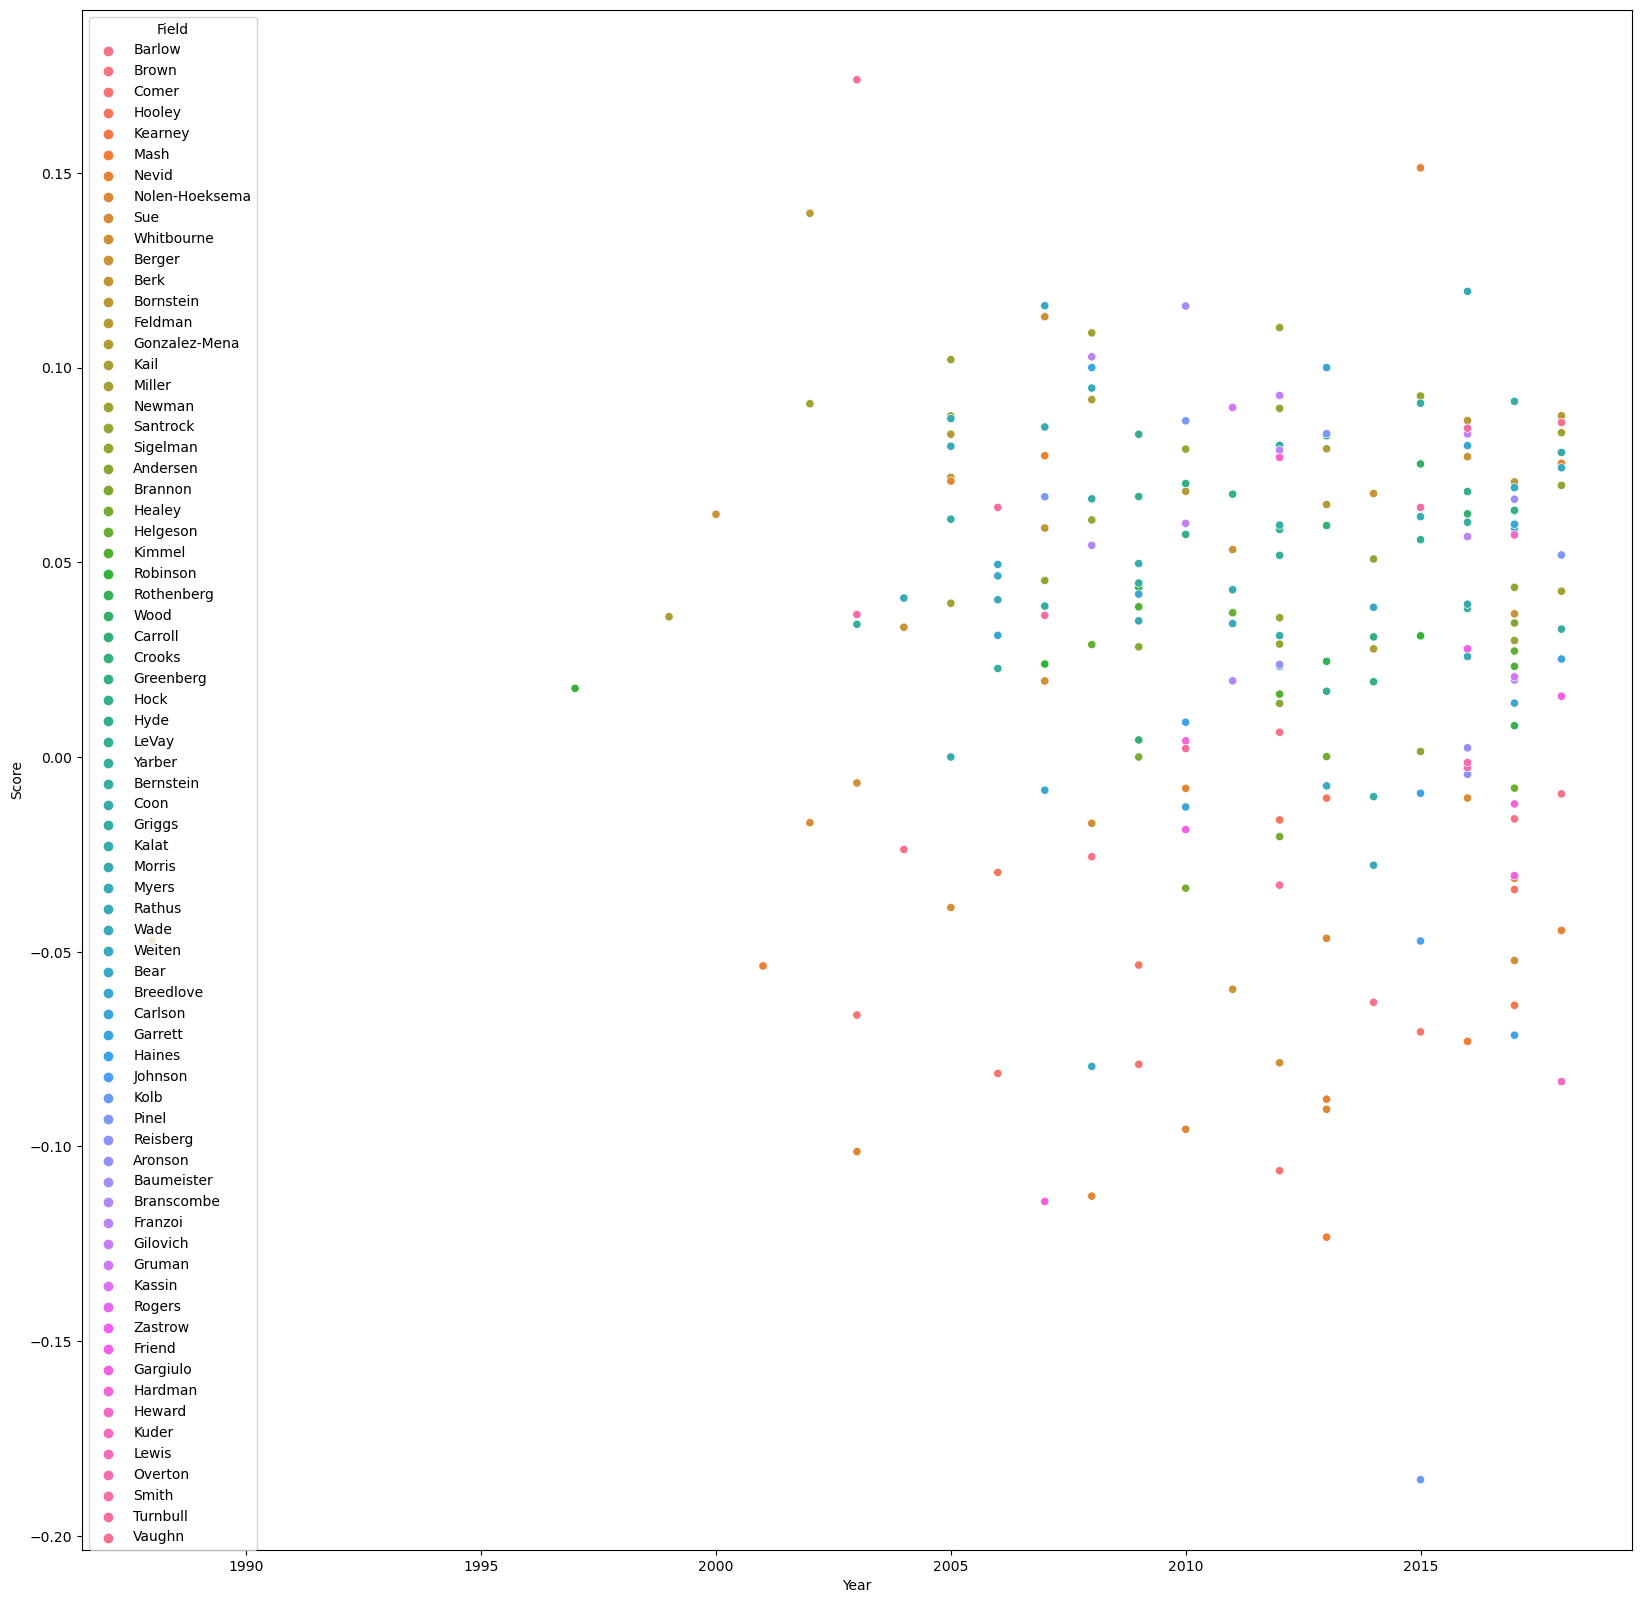

In [11]:
# Overall

overall_df = df

overall_df["Year"] = overall_df["Textbook"].map(book_years)

fields = []
for author in overall_df["Author"]:
    field = author.split("_")[0]
    fields.append(field)

overall_df["Field"] = fields

print(overall_df)

fig, ax = plt.subplots(figsize=(20,20))

sns.scatterplot(data=overall_df, x="Year", y="Score", hue="Field")